In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob

# For inline plotting in Jupyter Notebooks
%matplotlib inline

# Set plotting style and color palette
sns.set(style="whitegrid")
color_palette = sns.color_palette("pastel")

# Load the dataset
df = pd.read_csv('amazon.csv')

# Display basic info and the first few rows of the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
# Data Cleaning

# Remove currency symbols and commas from price columns and convert to float
df['discounted_price'] = df['discounted_price'].str.replace("₹", '').str.replace(",", '').astype('float64')
df['actual_price'] = df['actual_price'].str.replace("₹", '').str.replace(",", '').astype('float64')

# Convert discount_percentage to decimal format
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype('float64') / 100

# Handle unusual values in the rating column
df['rating'] = df['rating'].replace('|', '3.9').astype('float64')

# Convert rating_count to float by removing commas
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

# Check for missing values and handle them
df.isnull().sum()

# Impute missing values in rating_count with median
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].median())

# Verify that missing values are handled
df.isnull().sum()

# Check for duplicates in the dataset
df.duplicated().any()


False

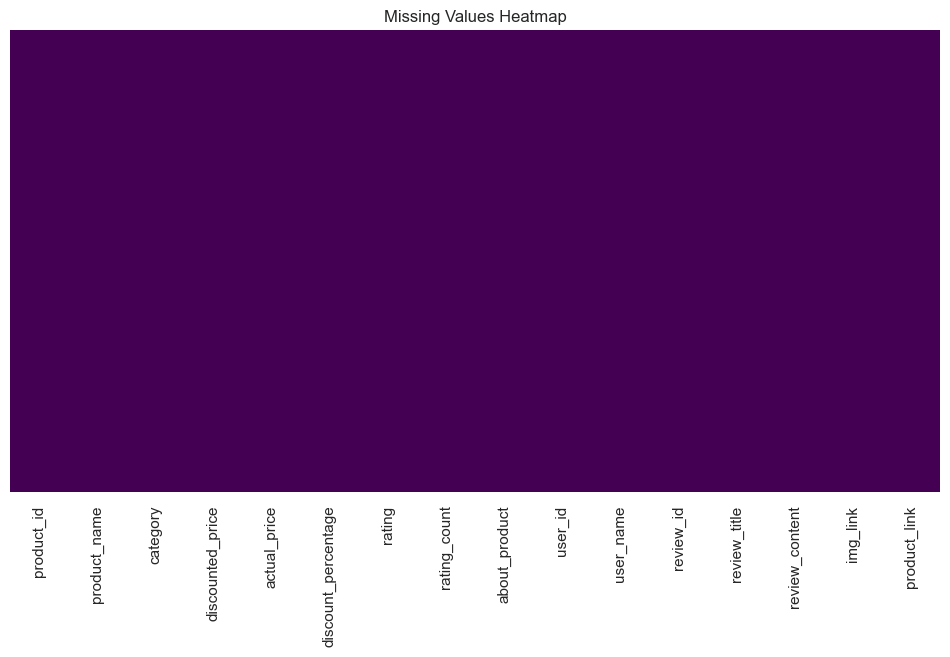

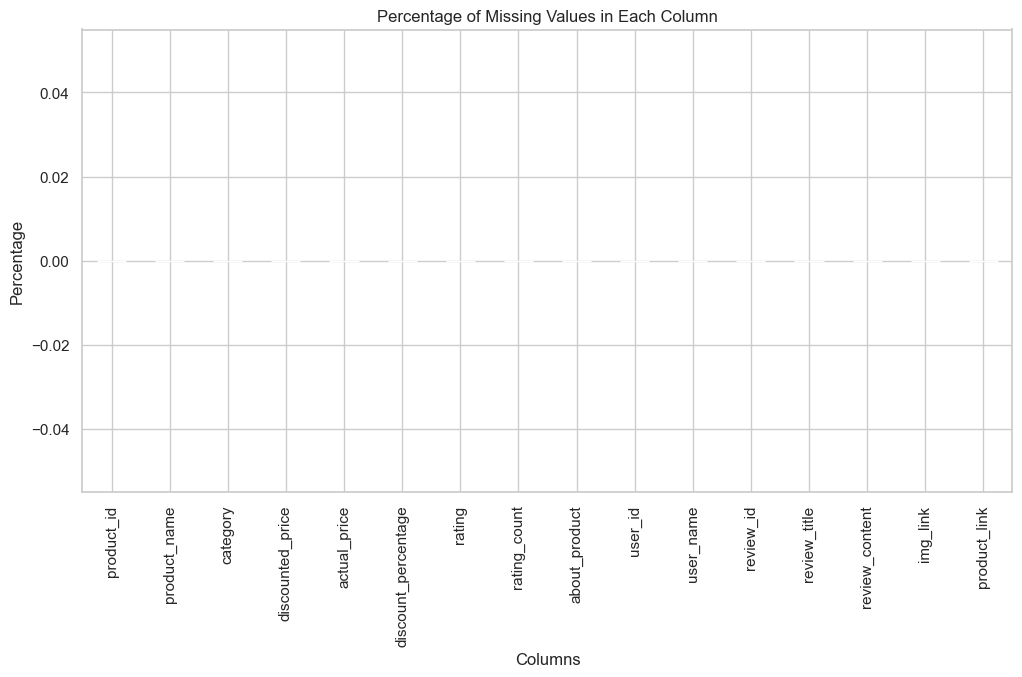

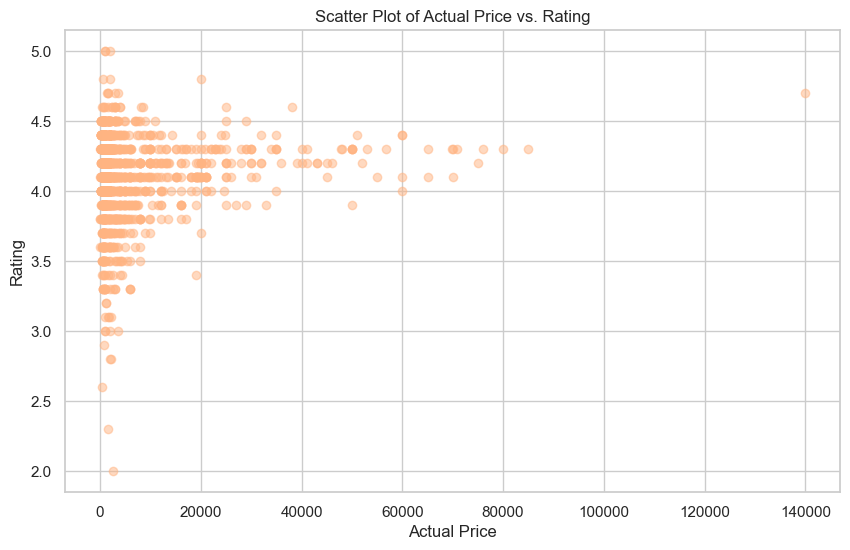

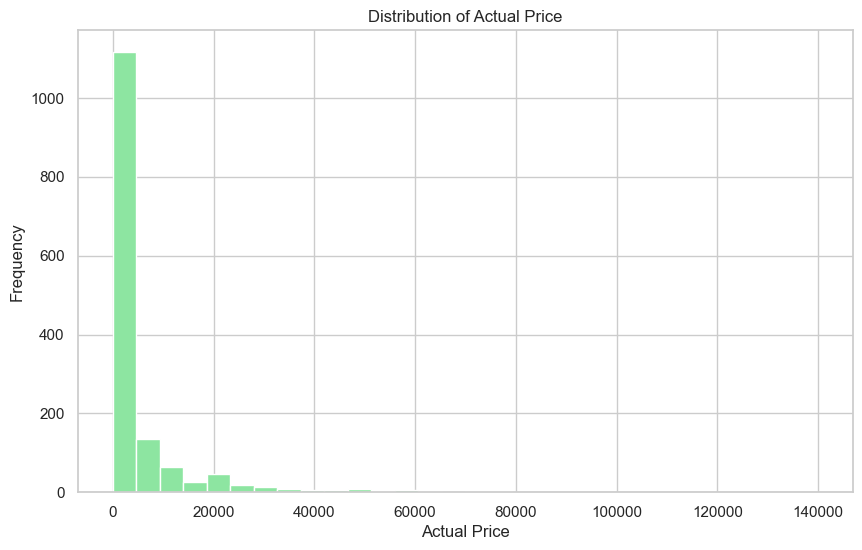

In [5]:
# Visualizing Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Plot missing values percentage
plt.figure(figsize=(12, 6))
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.plot(kind='bar', color=color_palette[0])
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in Each Column')
plt.show()

# Scatter plot: Actual Price vs. Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['rating'], color=color_palette[1], alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.title('Scatter Plot of Actual Price vs. Rating')
plt.show()

# Histogram: Distribution of Actual Price
plt.figure(figsize=(10, 6))
plt.hist(df['actual_price'], bins=30, color=color_palette[2])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Price')
plt.show()


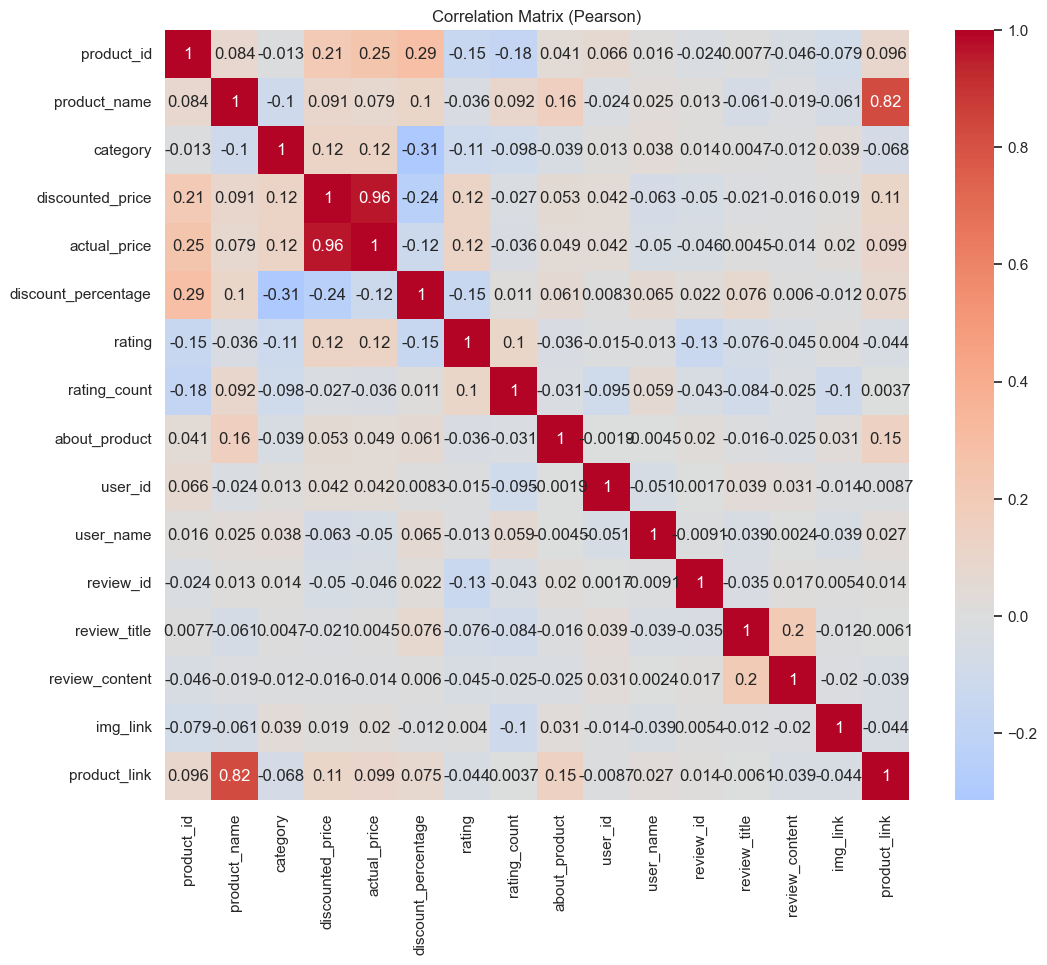

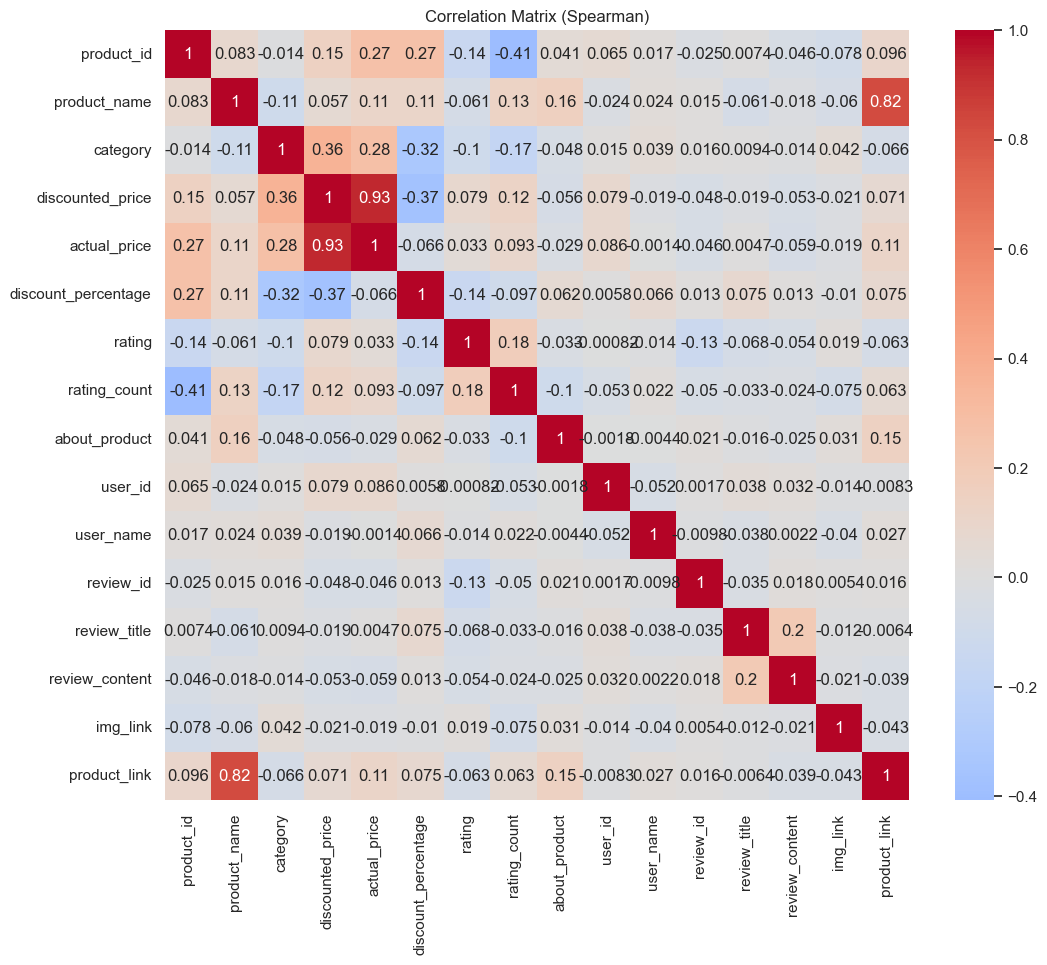

Correlation between discounted_price and rating: 0.12


In [6]:
# Label encoding categorical variables
categorical_columns = [
    'product_id', 'category', 'review_id', 'review_content',
    'product_name', 'user_name', 'about_product', 'user_id',
    'review_title', 'img_link', 'product_link'
]

label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    df[col] = label_encoders[col].fit_transform(df[col])

# Compute and visualize correlation matrices
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix (Pearson)')
plt.show()

# Spearman correlation
plt.figure(figsize=(12, 10))
spearman_correlation_matrix = df.corr(method="spearman")
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Matrix (Spearman)')
plt.show()

# Correlation between discounted price and rating
correlation_coefficient = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")


Mean Rating by Category:
category
57     4.6
48     4.5
62     4.5
81     4.5
196    4.5
      ... 
3      3.6
88     3.5
2      3.5
14     3.4
146    3.3
Name: rating, Length: 211, dtype: float64


C:\Users\shivh\AppData\Local\Temp\ipykernel_14648\3234180151.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette=color_palette)
C:\Users\shivh\AppData\Local\Temp\ipykernel_14648\3234180151.py:12: UserWarning: 
The palette list has fewer values (10) than needed (211) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette=color_palette)


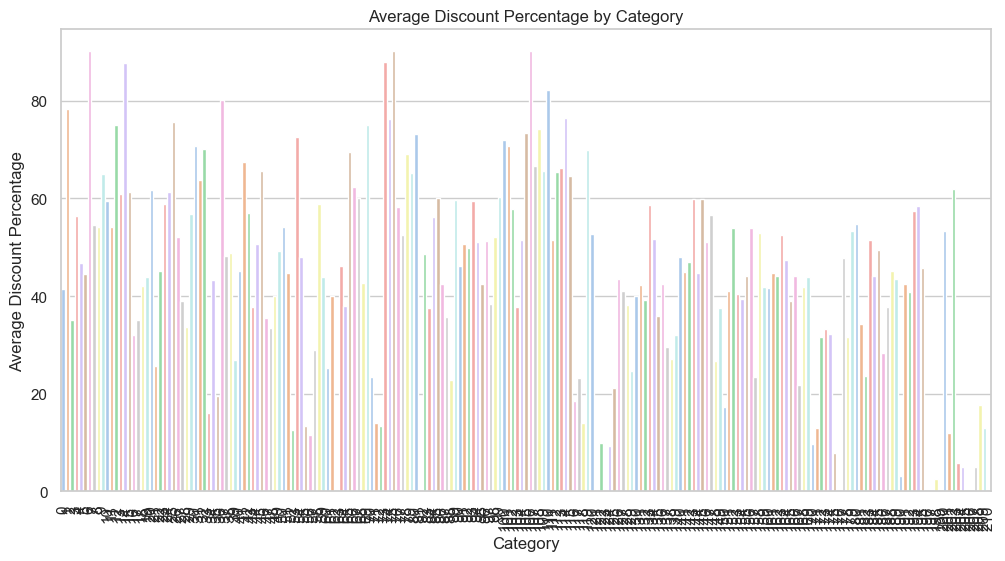

In [7]:
# Mean rating by category
mean_ratings_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Mean Rating by Category:")
print(mean_ratings_by_category)

# Average discount percentage by category
df['discount_percentage'] = (df['actual_price'] - df['discounted_price']) / df['actual_price'] * 100
avg_discount_per_category = df.groupby('category')['discount_percentage'].mean()

# Plot average discount percentage by category
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values, palette=color_palette)
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.title('Average Discount Percentage by Category')
plt.xticks(rotation=90)
plt.show()


In [9]:
# Extract keywords from product names
def extract_keywords(product_name):
    """Extracts keywords from a product name, handling potential numbers."""
    if isinstance(product_name, str):  # Check if it's a string
        keywords = product_name.lower().split()  # Split into words and lowercase
        keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
    else:
        keywords = []  # Handle non-string values (e.g., integers) by returning an empty list
    return keywords

df['keywords'] = df['product_name'].apply(extract_keywords)

# Count occurrences of keywords
all_keywords = [keyword for keywords in df['keywords'] for keyword in keywords]
keyword_counts = pd.Series(all_keywords).value_counts()

# Display the top 10 most frequent keywords
print("Top 10 Most Popular Keywords:")
print(keyword_counts.head(10))

# Sentiment analysis on reviews
# Convert review_content to string to ensure compatibility with TextBlob
df['review_content'] = df['review_content'].astype(str)

# Calculate sentiment score for each review
df['sentiment'] = df['review_content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Sort reviews by sentiment score
df_sorted_by_sentiment = df.sort_values(by='sentiment', ascending=False)

# Display top 10 reviews based on sentiment score
print("Top 10 Reviews Based on Sentiment Score:")
print(df_sorted_by_sentiment[['product_id', 'user_id', 'review_content', 'sentiment']].head(10))


Top 10 Most Popular Keywords:
Series([], Name: count, dtype: int64)
Top 10 Reviews Based on Sentiment Score:
     product_id  user_id review_content  sentiment
0           346      623            604        0.0
984          79      303            257        0.0
982         401      120            378        0.0
981         689       70           1041        0.0
980         215      306            505        0.0
979        1244      200            507        0.0
978        1308      956            785        0.0
977         532      354            198        0.0
976        1097      742           1144        0.0
975         730      110            806        0.0


In [10]:
# T-test between ratings in two categories
t_statistic, p_value = stats.ttest_ind(df[df['category'] == 'electronics']['rating'], df[df['category'] == 'clothing']['rating'])
print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.2f}")

# Chi-square test
contingency_table = pd.crosstab(df['actual_price'], df['rating'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.2f}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")


T-statistic: nan, P-value: nan
Chi-square statistic: 8635.26
P-value: 1.00
Degrees of freedom: 10752
Expected frequencies:
[[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


Top 10 Most Reviewed Products:
product_name
384     5
386     4
1158    3
655     3
118     3
975     3
84      3
1247    3
324     3
107     3
Name: count, dtype: int64


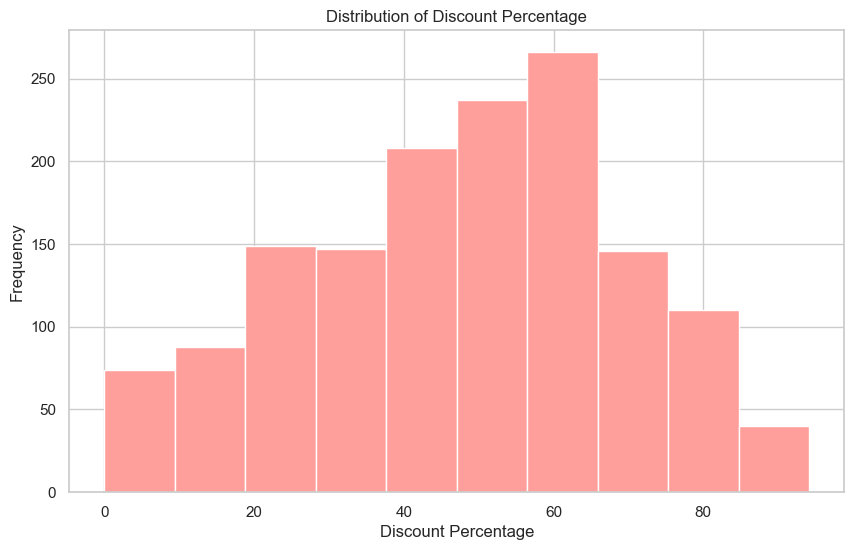

In [11]:
# Count occurrences of product names
product_counts = df['product_name'].value_counts()
print("Top 10 Most Reviewed Products:")
print(product_counts.head(10))

# Histogram of discount percentage
plt.figure(figsize=(10, 6))
df['discount_percentage'].hist(color=color_palette[3])
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Percentage')
plt.show()
